In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('mcu_films.csv')
df.head(5)

,movie,length_hrs,length_min,release_date,opening_weekend_us,gross_us,gross_world
0,Iron Man,2,6,5/2/2008,98618668,319034126,585796247
1,The Incredible Hulk,1,52,6/12/2008,55414050,134806913,264770996
2,Iron Man 2,2,4,5/7/2010,128122480,312433331,623933331
3,Thor,1,55,5/6/2011,65723338,181030624,449326618
4,Captain America: The First Avenger,2,4,7/22/2011,65058524,176654505,370569774


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movie               23 non-null     object
 1   length_hrs          23 non-null     int64 
 2   length_min          23 non-null     int64 
 3   release_date        23 non-null     object
 4   opening_weekend_us  23 non-null     int64 
 5   gross_us            23 non-null     int64 
 6   gross_world         23 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.4+ KB


In [ ]:
#Since we want to convert the released_date into DATE format, we will convert the datatypes using pd.to_datetime
df['release_date'] = pd.to_datetime(df['release_date'])

#To make the analysis more easier, we'll convert the movie duration into minutes, and, we'll drop columns 'length_hrs' and 'length_min'
df['movie_duration'] = df['length_hrs']*60 + df['length_min']
df = df.drop(columns=['length_hrs', 'length_min']).copy()
df.head(5)

,movie,release_date,opening_weekend_us,gross_us,gross_world,movie_duration
0,Iron Man,2008-05-02,98618668,319034126,585796247,126
1,The Incredible Hulk,2008-06-12,55414050,134806913,264770996,112
2,Iron Man 2,2010-05-07,128122480,312433331,623933331,124
3,Thor,2011-05-06,65723338,181030624,449326618,115
4,Captain America: The First Avenger,2011-07-22,65058524,176654505,370569774,124


In [ ]:
df.describe()

,release_date,opening_weekend_us,gross_us,gross_world,movie_duration
count,23,2.300000e+01,2.300000e+01,2.300000e+01,23.00000
mean,2015-02-18 21:54:46.956521728,1.350966e+08,3.716005e+08,9.821198e+08,130.26087
min,2008-05-02 00:00:00,5.541405e+07,1.348069e+08,2.647710e+08,112.00000
25%,2012-11-02 00:00:00,8.539808e+07,2.246453e+08,6.233037e+08,119.50000
50%,2015-07-17 00:00:00,1.170275e+08,3.337186e+08,8.539838e+08,129.00000
75%,2017-12-25 12:00:00,1.766419e+08,4.179219e+08,1.184186e+09,136.00000
max,2019-07-02 00:00:00,3.571150e+08,8.583730e+08,2.797801e+09,181.00000
std,NaN,7.343531e+07,1.882211e+08,5.769531e+08,15.47202


#Finding Summary
The dataset consists of 23 MCU films, released from 2008 to 2019.

The average opening weekend earnings in the US is around $135 million.

The total gross earnings in the US average around $371 million.

The total worldwide gross earnings average nearly $982 million.

The films generally have a length ranging from about 1 hour and 52 minutes to 3 hours and 1 minute, with an average length of about 2 hours and 10 minutes. Most films are clustered around 2 hours and 9 minutes, as indicated by the median.

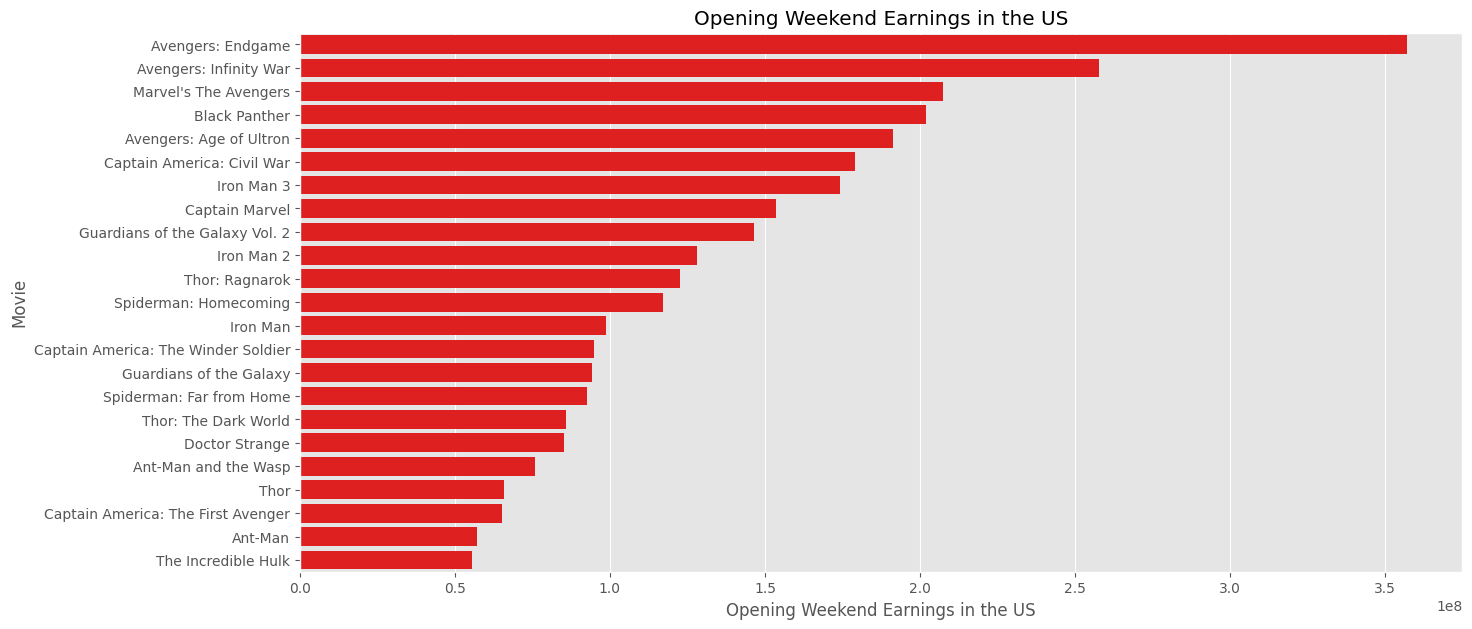

Opening Weekend Earning in US:
                                  movie  opening_weekend_us
21                    Avengers: Endgame           357115007
18               Avengers: Infinity War           257698183
5                 Marvel's The Avengers           207438708
17                        Black Panther           202003951
10              Avengers: Age of Ultron           191271109
12           Captain America: Civil War           179139142
6                            Iron Man 3           174144585
20                       Captain Marvel           153433423
14       Guardians of the Galaxy Vol. 2           146510104
2                            Iron Man 2           128122480
16                       Thor: Ragnarok           122744989
15                Spiderman: Homecoming           117027503
0                              Iron Man            98618668
8   Captain America: The Winder Soldier            95023721
9               Guardians of the Galaxy            94320883
22       

In [ ]:
opening_weekend_ranking = df.sort_values(['opening_weekend_us'], ascending=False)
red = '#ED1D24'

plt.figure(figsize=(15,7))

sns.barplot(
    data = opening_weekend_ranking,
    x = 'opening_weekend_us',
    y = 'movie',
    color = 'red'
)

plt.title('Opening Weekend Earnings in the US')
plt.xlabel('Opening Weekend Earnings in the US')
plt.ylabel('Movie')
plt.show()

print('Opening Weekend Earning in US:')
print(opening_weekend_ranking[['movie', 'opening_weekend_us']])


In [ ]:
df_gross_sorted = df.sort_values('gross_world', ascending=False)

#stacked barplot between world gross and us

<BarContainer object of 23 artists>

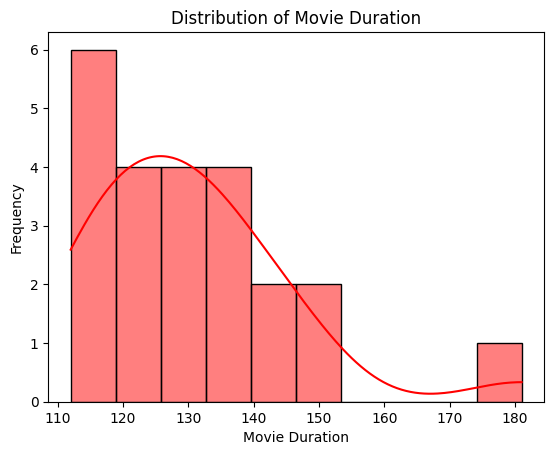

In [ ]:
sns.histplot(
    data = df,
    x = 'movie_duration',
    bins = 10,
    kde = True,
    color = 'red'
)

plt.title('Distribution of Movie Duration')
plt.xlabel('Movie Duration')
plt.ylabel('Frequency')
plt.show()